In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_df = pd.read_csv('correlated_features.csv')

# Exploratory data analysis

In [4]:
train_df.head()

,language,sentence,n,degree,harmonic,betweenness,pagerank,closeness,eigenvector,katz,load,is_root
0,Arabic,2,21,0.05,5.381349,0.000000,0.026870,0.202020,0.121919,0.217232,0.000000,0
1,Arabic,2,21,0.10,6.216270,0.394737,0.048072,0.192308,0.047211,0.218324,0.394737,0
2,Arabic,2,21,0.05,5.403211,0.000000,0.027086,0.178571,0.203677,0.217232,0.000000,0
3,Arabic,2,21,0.10,6.273016,0.442105,0.047721,0.210526,0.067535,0.218318,0.442105,0
4,Arabic,2,21,0.10,6.247655,0.100000,0.051047,0.198020,0.256177,0.218318,0.100000,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197479 entries, 0 to 197478
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   language     197479 non-null  object 
 1   sentence     197479 non-null  int64  
 2   n            197479 non-null  int64  
 3   degree       197479 non-null  float64
 4   harmonic     197479 non-null  float64
 5   betweenness  197479 non-null  float64
 6   pagerank     197479 non-null  float64
 7   closeness    197479 non-null  float64
 8   eigenvector  197479 non-null  float64
 9   katz         197479 non-null  float64
 10  load         197479 non-null  float64
 11  is_root      197479 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 18.1+ MB


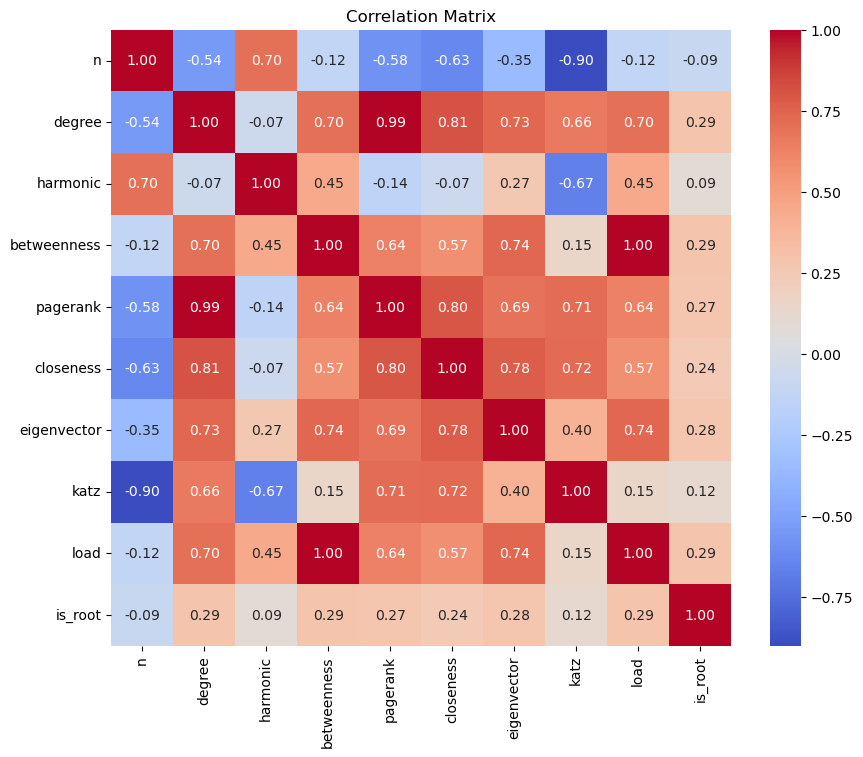

In [6]:
# check the carrelation between features
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.drop(['sentence', 'language'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

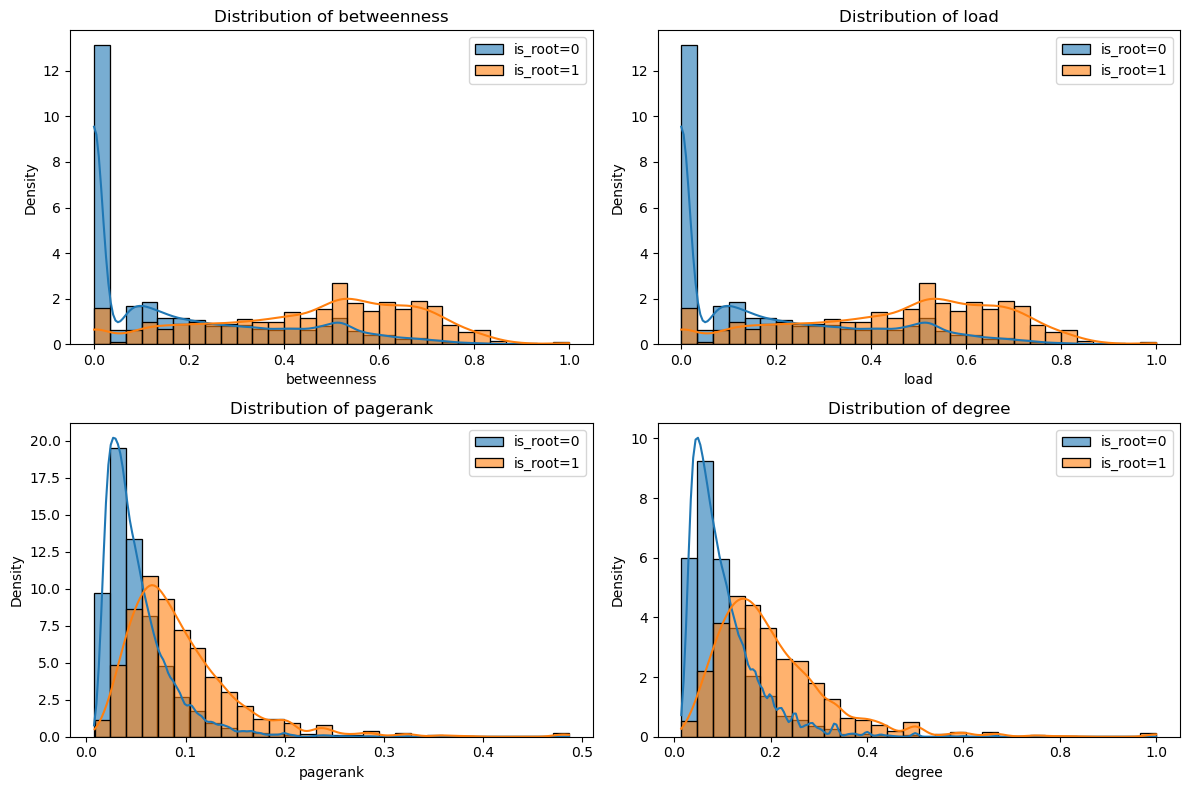

In [7]:
features = [col for col in ['betweenness', 'load', 'pagerank', 'degree']]

n_features = len(features)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(train_df[train_df['is_root'] == 0][feature], bins=30, kde=True, ax=axes[i], color='tab:blue', label='is_root=0', stat='density', alpha=0.6)
    sns.histplot(train_df[train_df['is_root'] == 1][feature], bins=30, kde=True, ax=axes[i], color='tab:orange', label='is_root=1', stat='density', alpha=0.6)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].legend()
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()